# Clustering Methods Exercises

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, it can be fun to see how our clustering results map onto color and quality.

In [1]:
from __future__ import print_function
import os
data_path = ['data']

## Question 1

* Import the data and examine the features. 
* Note which are continuous, categorical, and boolean. 
* How many entries are there for the two colors and range of qualities? 
* Make a histogram plot of the quality for each of the wine colors.

In [2]:
import pandas as pd
file_path = os.sep.join(data_path+['Wine_Quality_Data.csv'])
data = pd.read_csv(file_path,sep=',',header=0)
data.head(4).T

,0,1,2,3
fixed_acidity,7.4,7.8,7.8,11.2
volatile_acidity,0.7,0.88,0.76,0.28
citric_acid,0,0,0.04,0.56
residual_sugar,1.9,2.6,2.3,1.9
chlorides,0.076,0.098,0.092,0.075
free_sulfur_dioxide,11,25,15,17
total_sulfur_dioxide,34,67,54,60
density,0.9978,0.9968,0.997,0.998
pH,3.51,3.2,3.26,3.16
sulphates,0.56,0.68,0.65,0.58


In [3]:
data.shape

(6497, 13)

The data types for each entry. The implementation of K-means in Scikit-learn is designed only to work with continuous data (even though it is sometimes used with categorical or boolean types). Fortunately, all the columns we will be using (everything except quality and color) are continuous.

In [4]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

The number of entries for each wine color.

In [18]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

The distribution of quality values.

In [6]:
data.quality.value_counts(normalize=True).sort_index()

3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: quality, dtype: float64

Now for the histogram.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [17]:
q_data = data.loc[data.color=='red', 'quality']
q_data

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


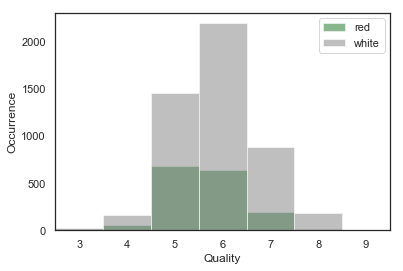

In [20]:
sns.set('notebook','white','dark')

# custom colors
red = sns.color_palette()[2]
white = 'gray'

# set bins for histogram
bin_range = np.arange(3,10,1)

# Plot histogram for quality counts for red and white wines
ax = plt.axes()

for color, plot_color in zip(['red','white'],[red,white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range,
               ax=ax, alpha=.5, color=plot_color,
               label=color)
    
    
ax.legend()
ax.set(xlabel='Quality',ylabel='Occurrence')

# force ticks to be in the middle of the graph
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range)
ax.grid('off')

## Question 2

* Example the correlation and skew of the relevant variables--everything except color and quality.
* Perform any appropriate feature transformations and/or scaling.
* Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [23]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# The correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,0.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile_acidity,0.219008,0.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric_acid,0.324436,-0.377981,0.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual_sugar,-0.111981,-0.196011,0.142451,0.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,0.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,0.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,0.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,0.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,0.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,0.000000,-0.003029


In [24]:
type(corr_mat)

pandas.core.frame.DataFrame

In [25]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

And an examination of the skew values in anticipation of transformations.

In [33]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns>0.75]
skew_columns.index.tolist()

['chlorides',
 'sulphates',
 'fixed_acidity',
 'volatile_acidity',
 'residual_sugar',
 'free_sulfur_dioxide']

In [34]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])


Perform feature scaling.

In [36]:
from sklearn.preprocessing import StandardScaler

data[float_columns] = StandardScaler().fit_transform(data[float_columns])
data.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red
1,0.550261,3.012817,-2.192833,-0.498175,1.281999,-0.013944,-0.862469,0.701486,-0.115073,1.059213,-0.580068,5,red
2,0.550261,2.438032,-1.917553,-0.625740,1.104012,-0.754684,-1.092486,0.768188,0.258120,0.862549,-0.580068,5,red
3,2.802728,-0.337109,1.661085,-0.815173,0.594352,-0.574982,-0.986324,1.101694,-0.363868,0.389396,-0.580068,6,red


Finally, the pairplot of the transformed and scaled features.

In [40]:
data[float_columns + ['quality']].sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4560,-0.193626,-0.684343,0.628786,0.845168,-0.794667,0.254413,-0.030868,-0.339054,0.009325,0.109519,0.426120,6
3732,0.931294,-0.613780,-0.334694,-0.717399,-0.794667,-0.200998,0.818427,-1.099449,-1.421248,1.059213,1.180761,6
6191,-0.370429,0.749610,-0.128234,0.322259,-0.605997,0.099123,0.871507,-1.159480,-0.612663,-0.472730,1.432308,6
1490,-0.021244,-0.755481,1.179346,-0.866619,-0.512071,-1.632519,-1.729457,-0.419096,1.066704,0.250355,1.600006,6
5366,-0.193626,0.443810,-1.022893,1.482414,-0.700195,1.261922,1.243074,0.948281,-0.861459,-0.250731,-0.915464,5


C:\Users\Bomera Moses\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


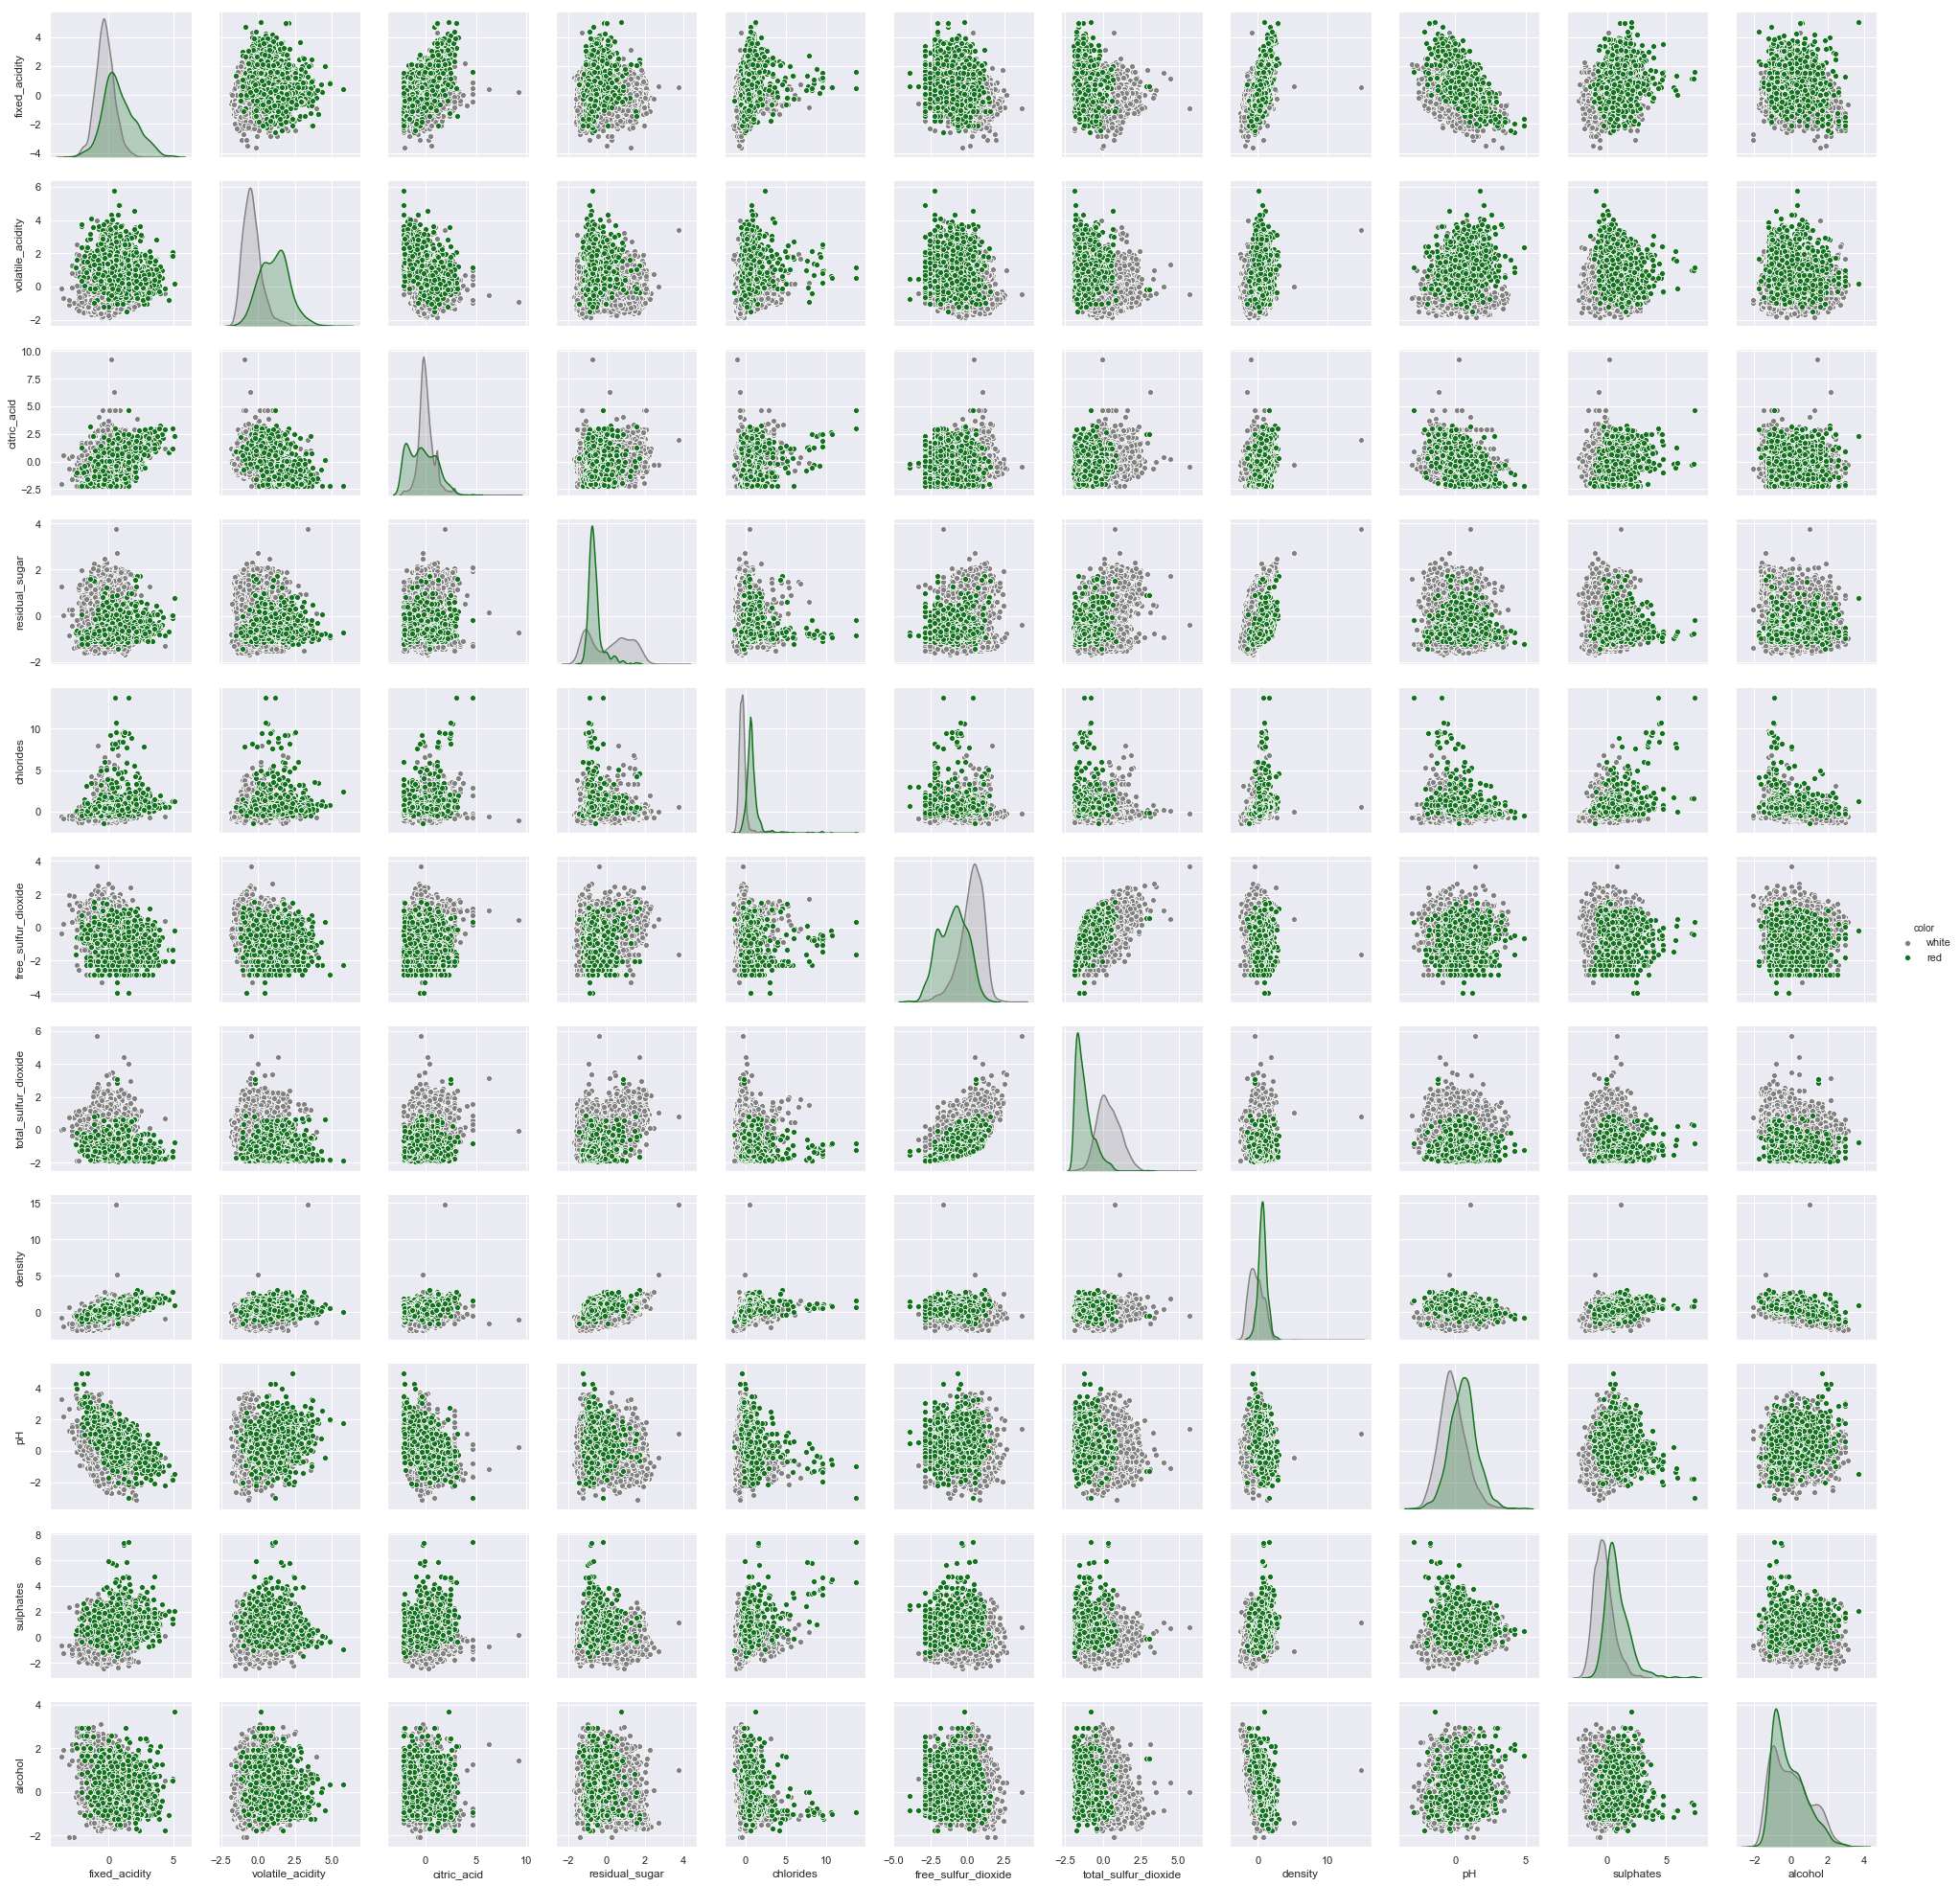

In [41]:
sns.set('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'});

## Question 3

* Fit a K-means clustering model with two clusters.
* Examine the clusters by wine color.

In [42]:
from sklearn.cluster import KMeans

#from sklearn.cluster import cluster

km = KMeans(n_clusters=2, random_state=45).fit(data[float_columns])

data['kmeans'] = km.predict(data[float_columns])

In [52]:
(data[['color','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color kmeans        
red   0         1576
      1           23
white 0           87
      1         4811

## Question 4

* Now fit K-Means models with cluster values ranging from 1 to 20.
* For each model, store the number of clusters and the inertia value. 
* Plot cluster number vs inertia. Does there appear to be an ideal cluster number?

In [53]:
# Create and fit a range of models
km_list = list()

for clust in range(1,20):
    km = KMeans(n_clusters=clust, random_state=45)
    km = km.fit(data[float_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

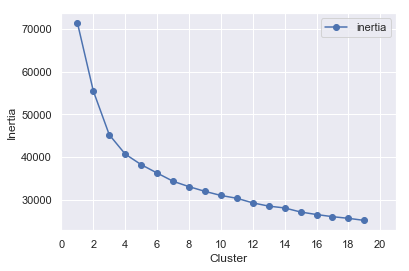

In [54]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

## Question 5

* Fit an agglomerative clustering model with two clusters.
* Compare the results to those obtained by K-means with regards to wine color.
* Visualize the dendrogram produced by agglomerative clustering. *Hint:* SciPy has a module called [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.

In [60]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=2,linkage='ward',compute_full_tree=True).fit(data[float_columns])
data['agg'] = ag.fit_predict(data[float_columns])

Note that cluster assignment is arbitrary, the respective primary cluster numbers for red and white may not be identical to the ones below and also may not be the same for both K-means and agglomerative clustering.

In [61]:
(data[['color','agg','kmeans']]
.groupby(['color','agg','kmeans'])
.size()
.to_frame()
.rename(columns={0:'number'}))

number
color agg kmeans        
red   0   0           13
          1           18
      1   0         1563
          1            5
white 0   0           38
          1         4717
      1   0           49
          1           94

Though the cluster numbers are not necessarily identical, the clusters are very consistent within a single wine variety (red or white).

And here is a plot of the dendrogram created from agglomerative clustering.

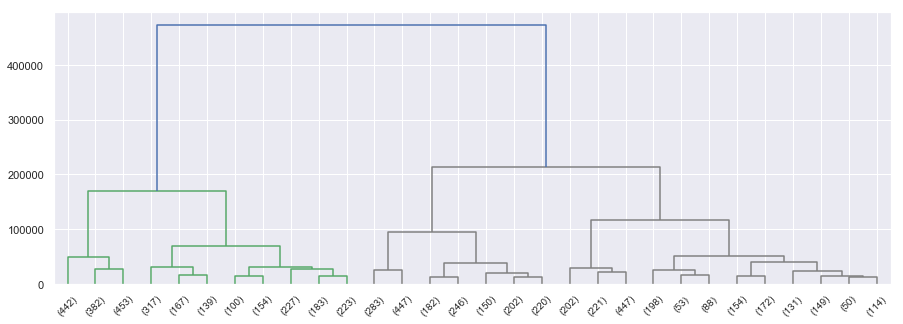

In [63]:
from scipy.cluster import hierarchy
from matplotlib import colors

Z = hierarchy.linkage(ag.children_,method='ward')
fig, ax = plt.subplots(figsize=(15,5))

dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red,'gray'])

den = hierarchy.dendrogram(Z, orientation='top',
                          p=30, truncate_mode='lastp',
                          show_leaf_counts=True, ax=ax,
                          above_threshold_color=blue)

## Question 6

In this question, we are going to explore clustering as a form of feature engineering.

* Create a **binary** target variable `y`, denoting if the quality is greater than 7 or not.
* Create a variable called `X_with_kmeans` from `data`, by dropping the columns "quality", "color" and "agglom" from the dataset. Create `X_without_kmeans` from that by dropping "kmeans".
* For both datasets, using `StratifiedShuffleSplit` with 10 splits, fit 10 Random Forest Classifiers and average out the roc-auc scores.
* Compare the average roc-auc scores for the models using the kmeans clusters as a feature and the one that doesn't use it.

In [75]:
len(data['quality']>7)

6497

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

y = (data['quality']>7).astype(np.int)
X_with_kmeans = data.drop(['quality','color','agg'], axis=1)
X_without_kmeans = X_with_kmeans.drop(['kmeans'], axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=45)

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = list()
    for train_idx, test_idx in sss.split(X,y):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        estimator.fit(X_train,y_train)
        y_pred = estimator.predict(X_test)
        y_proba = estimator.predict_proba(X_test)[:,1]
        roc_auc_list.append(roc_auc_score(y_test, y_proba))
    return np.mean(roc_auc_list)

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)

print("With kmeans cluster as input to the random forest, roc-auc is \"{0}\"".format(roc_with_kmeans))
print("Without kmeans cluster as input to the random forest, roc-auc is\"{0}\"".format(roc_without_kmeans))


C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


With kmeans cluster as input to the random forest, roc-auc is "0.8056031746031745"
Without kmeans cluster as input to the random forest, roc-auc is"0.810329365079365"


In [71]:
data.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,kmeans,aag,agg
562,1.431664,1.274383,1.179346,-0.380828,1.163449,0.717742,-0.101642,1.168395,-0.861459,0.594692,-1.083162,5,red,0,1,1
5148,-1.027586,-0.003182,-0.816433,-0.866619,-0.763146,0.983754,0.765346,-0.932696,1.191102,0.038414,0.426120,6,white,1,0,0
4387,-0.193626,0.443810,0.697606,0.518024,0.321259,0.717742,1.066137,0.274598,-0.612663,0.109519,-0.915464,5,white,1,0,0
3432,0.229509,0.986752,-0.541153,1.697824,-0.794667,0.439574,0.659184,0.201227,-0.550465,-0.105201,1.264610,7,white,1,0,0
5531,-0.193626,-0.755481,-0.265874,0.812221,-0.169982,0.788718,0.004519,-0.479127,0.009325,0.526688,0.845365,8,white,1,0,0
3449,-0.021244,-0.543784,-0.472334,-0.975266,-0.293961,1.013967,1.154606,-0.732592,-0.115073,-0.775933,0.426120,7,white,1,0,0
1080,2.274347,-0.405457,1.661085,-1.092614,-0.262922,-2.869757,-1.906393,0.004458,-0.363868,-0.105201,1.096912,6,red,0,1,1
795,2.572875,3.059048,-0.128234,-0.498175,2.272579,-1.812220,-0.986324,1.055003,-1.421248,3.902804,-0.244672,5,red,0,1,1
3466,-0.193626,0.255042,-0.265874,1.574393,-0.763146,0.439574,0.376086,0.034473,-0.737061,-1.167179,0.929214,6,white,1,0,0
3393,-0.460560,0.255042,-0.541153,-0.765471,0.260259,-0.136065,0.075294,-0.032228,0.631312,0.109519,-0.915464,5,white,1,0,0


Let's now explore if the number of clusters have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a kmeans algotihm with n clusters. One hot encode it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

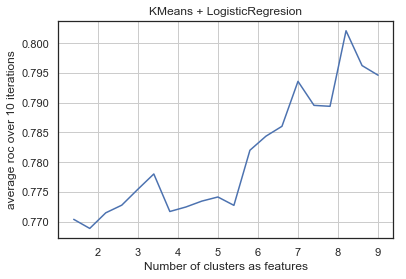

In [85]:
from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(X_basis)
    km_col = pd.Series(km.predict(X_basis))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)

estimator = LogisticRegression()
ns = range(1,21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y) for n in ns]

# Seaborn styles 
sns.set('notebook', 'white', 'deep')

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(xticklabels=ns,
      xlabel='Number of clusters as features',
      ylabel='average roc over 10 iterations',
      title='KMeans + LogisticRegresion')
ax.grid(True)


## Question 7

Let's now explore on DBSCAN clustering method and if the number of samples have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a kmeans algotihm with n clusters. One hot encode it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


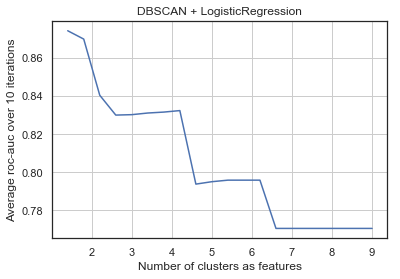

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10,random_state=6532)

def create_dbscan_columns(n):
    db = DBSCAN(min_samples=n)
    db.fit(X_basis)
    db_col = pd.Series(db.fit_predict(X_basis))
    db_cols = pd.get_dummies(db_col, prefix='dbscan_cluster')
    return pd.concat([X_basis, db_cols], axis=1)

estimator=LogisticRegression()
ns = range(1,21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_dbscan_columns(n),y) for n in ns]

sns.set('notebook','white','deep')
ax = plt.axes()
ax.plot(ns,roc_auc_list)
ax.set(
    xticklabels=ns,
    xlabel='Number of clusters as features',
    ylabel='Average roc-auc over 10 iterations',
    title='DBSCAN + LogisticRegression'
)
ax.grid(True)

## Question 8

Let's now explore on Birch clustering method and if the number of clusters have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a kmeans algotihm with n clusters. One hot encode it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

In [ ]:
from sklearn.cluster import Birch
from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10,random_state=6532)

def create_birch_columns(n):
    birch = Birch(n_clusters=n)
    birch.fit(X_basis)
    birch_col = birch.fit_predict(X_basis)
    birch_cols = pd.get_dummies(birch_col, prefix='BIRCH_columns')
    return pd.concat([X_basis,birch_cols], axis=1)

estimator=LogisticRegression()
roc_auc_list = [get_avg_roc_10splits(estimator, create_birch_columns(n),y) for n in ns]

sns.set('talk', 'white', 'dark')
ax = plt.axes()

ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels=ns,
    xlabel='Number of clusters as features',
    ylabel='Average roc-auc over 10 iterations',
    title='Birch + LogisticRegression'
)
ax.grid(True)